In [1]:
import matplotlib.pyplot as plt
from skimage import data, color
from skimage import data
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold
from skimage.filters import threshold_local

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/images/image_cat.jpg
/kaggle/input/images/toronjas.jpg
/kaggle/input/images/damaged_astronaut.png
/kaggle/input/images/face_det25.jpg
/kaggle/input/images/4.1.01.tiff
/kaggle/input/images/sally_damaged_image.jpg
/kaggle/input/images/steps_contours.png
/kaggle/input/images/building_image.jpg
/kaggle/input/images/face_det3.jpg
/kaggle/input/images/sevilleup(2).jpg
/kaggle/input/images/noise-noisy-nature.jpg
/kaggle/input/images/sally2.jpg
/kaggle/input/images/coffee.png
/kaggle/input/images/dices.png
/kaggle/input/images/r5.png
/kaggle/input/images/corners_building_top.jpg
/kaggle/input/images/image_aerial.tiff
/kaggle/input/images/chest_xray_image.png
/kaggle/input/images/face_det_friends22.jpg
/kaggle/input/images/madrid.jpg
/kaggle/input/images/bw.jpg
/kaggle/input/images/world_image_binary.jpg
/kaggle/input/images/shapes52.jpg
/kaggle/input/images/fruits-2.jpg
/kaggle/input/images/4.2.06_w_logo_2_2.png
/kaggle/input/images/miny.jpeg
/kaggle/input/images/dogs_banner.jpg


# Definition show_image()

In [2]:
def show_image(image,title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Loading the image using Matplotlib

In [3]:
madrid_image=plt.imread("/kaggle/input/images/madrid.jpg")
type(madrid_image)
image=plt.imread("/kaggle/input/images/4.2.06_w_logo_2_2.png")
image2=plt.imread("/kaggle/input/images/bw.jpg")
chess_pieces_image=plt.imread("/kaggle/input/images/bw.jpg")
tools_image=plt.imread("/kaggle/input/images/shapes52.jpg")


# Colors with NumPy

In [4]:
#Obtaining the red values of the image
red=madrid_image[:,:,0]
#Obtaining the green values of the image
green=madrid_image[:,:,1]
#Obtaining the blue values of the image
blue=madrid_image[:,:,2]

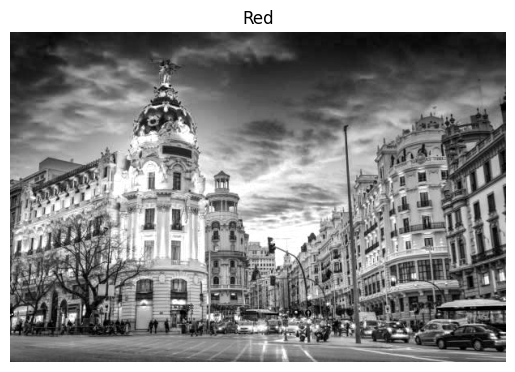

In [5]:
plt.imshow(red, cmap="gray")
plt.title("Red")
plt.axis("off")
plt.show()

In [6]:
# Accessing the shape of the image
madrid_image.shape
madrid_image.size

747252

# Flipping Images

## a) vertically

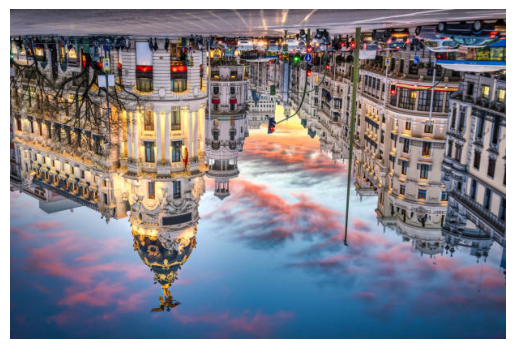

In [7]:
# Flip the image in up direction
vertically_flipped=np.flipud(madrid_image)
plt.axis("off")
plt.imshow(vertically_flipped)

## b) horizontally

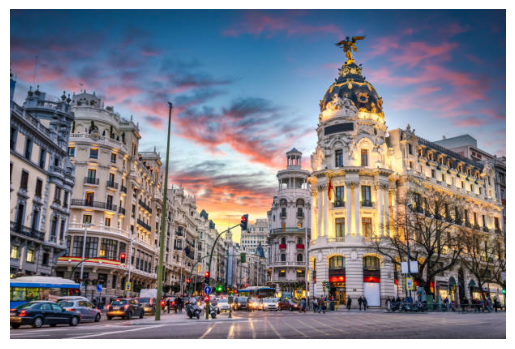

In [8]:
#Flip the image in left direction
horizontally_flipped=np.fliplr(madrid_image)
plt.axis("off")
plt.imshow(horizontally_flipped)

# Histograms in Matplotlib

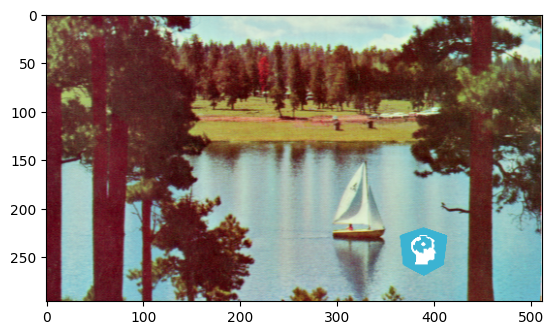

In [9]:
plt.imshow(image)

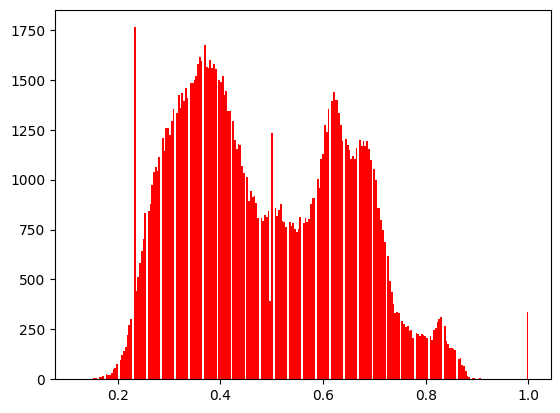

In [10]:
# Red color of the image
red=image[:,:,0]

# Obtain the red histogram
plt.hist(red.ravel(),bins=256,color="r")
plt.show()

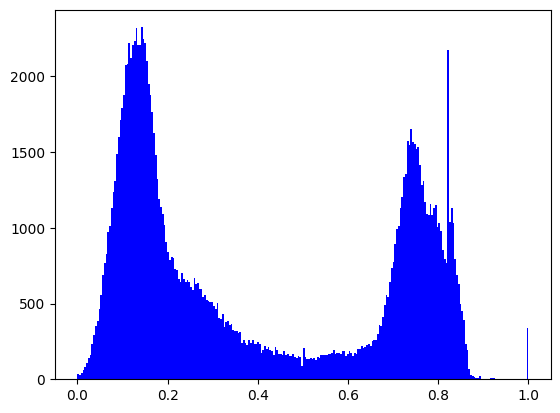

In [11]:
# Blue color of the image
blue=image[:,:,2]

# Obtain the red histogram
plt.hist(blue.ravel(),bins=256,color="b")
plt.show()

# Gray Scale

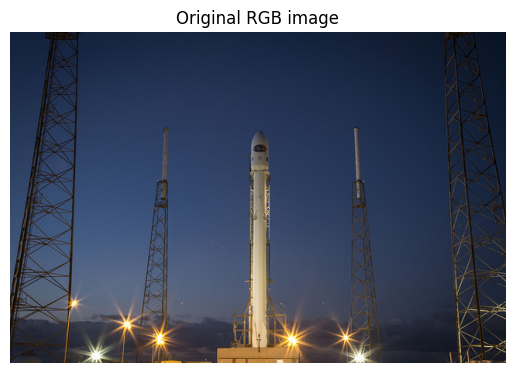

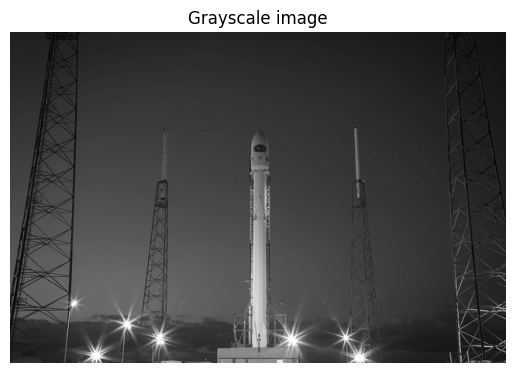

In [12]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

# Thresholding

In [13]:
# Convert the image to grayscale
gray_image = rgb2gray(image2)

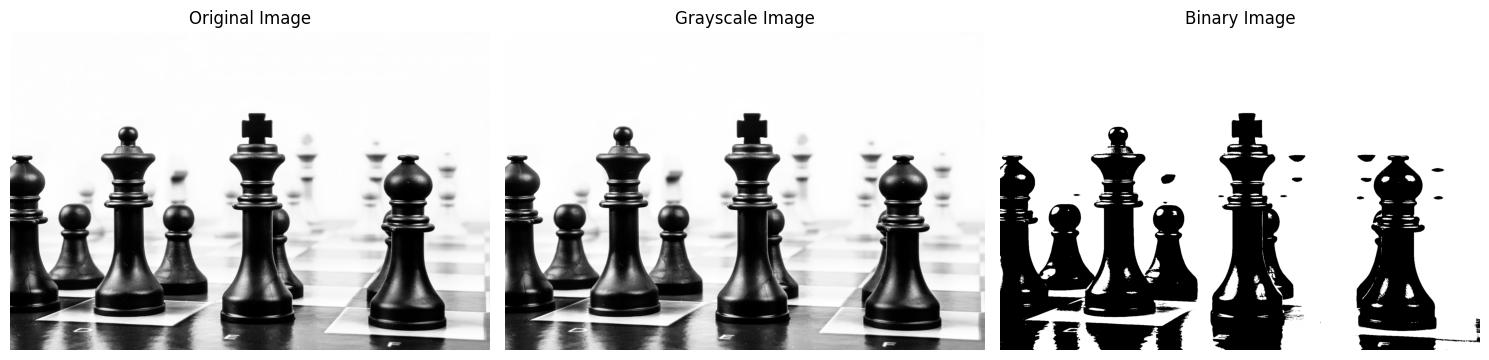

In [14]:
# Apply Otsu's thresholding
thresh = threshold_otsu(gray_image)
binary = gray_image > thresh

# Plotting the images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(image2)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(gray_image, cmap='gray')
ax[1].set_title('Grayscale Image')
ax[1].axis('off')

ax[2].imshow(binary, cmap='gray')
ax[2].set_title('Binary Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()

**Global Thresholding**: Uses a single threshold value applied to the entire image. It can be sensitive to lighting changes across the image.

**Local Thresholding**: Uses different threshold values for different regions of the image, providing more uniform results. It is more robust to varying lighting conditions.

## Apply global thresholding

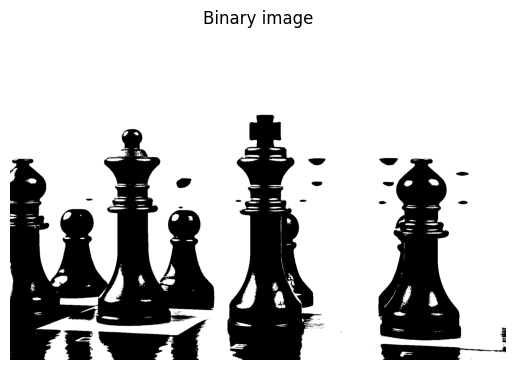

In [15]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

## try_all_threshold

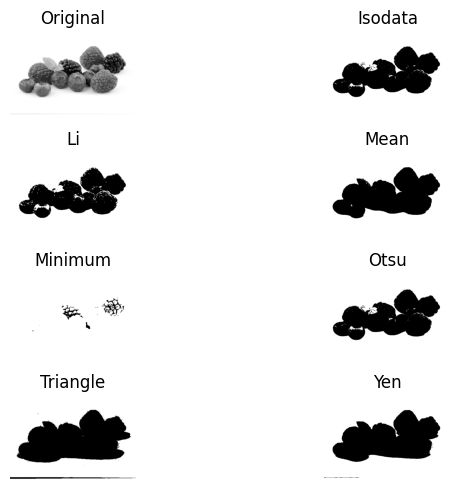

In [16]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray converter function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
fruits_image=image=plt.imread("/kaggle/input/images/fruits-2.jpg")
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

## Threshold Global vs. Threshold Local

### a) Global

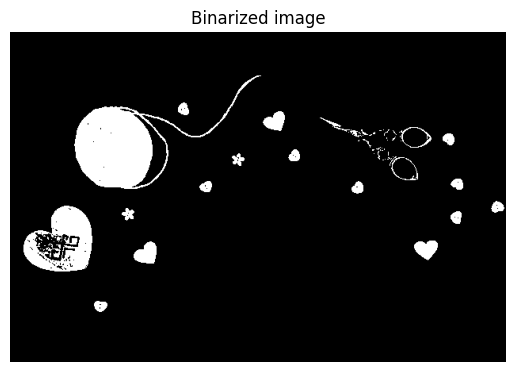

In [17]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
tools_image=plt.imread("/kaggle/input/images/shapes52.jpg")
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

### b) Local

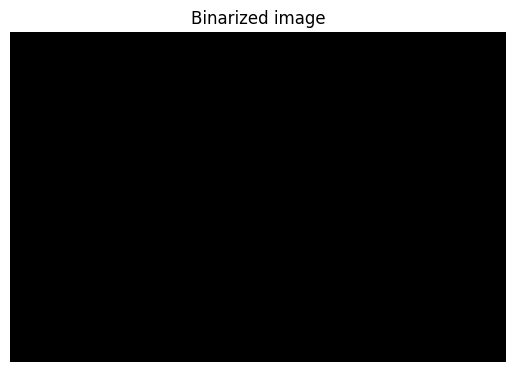

In [18]:
# Import threshold and gray convertor functions
# Import the local threshold function
from skimage.filters import threshold_local
from skimage.color import rgb2gray

# Turn the image grayscale

gray_tools_image = rgb2gray(tools_image)



# Obtain the local threshold value (block size: window size)
block_size = 35
local_thresh = threshold_local(gray_tools_image, block_size, offset=10)

# Obtain the binary image by applying thresholding
binary_local = gray_tools_image > local_thresh

# Show the resulting binary image
show_image(binary_local, 'Binarized image')
